In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as p
from sklearn import linear_model

In [2]:
data= pd.read_csv('/content/scrap price.csv') # https://www.theaa.com/ scrapped data from this website

In [3]:
data.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.shape

(205, 26)

In [5]:
data.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [6]:
data.drop('ID',inplace=True,axis=1)

In [7]:
data.head()

,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
data['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [9]:
data['name'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   name              205 non-null    object 
 2   fueltypes         205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumbers       205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheels       205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [11]:
data['doornumbers'].unique()

array(['two', 'four'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['doornumbers_encoded'] = le.fit_transform(data['doornumbers'])


In [13]:
data.head()

,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,doornumbers_encoded
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0


In [14]:
data.drop('doornumbers',inplace=True,axis=1)

In [15]:
data.head()

,symboling,name,fueltypes,aspiration,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,doornumbers_encoded
0,3,alfa-romero giulia,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,3,alfa-romero stelvio,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,1,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,2,audi 100 ls,gas,std,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0
4,2,audi 100ls,gas,std,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0


In [16]:
label_encoder = LabelEncoder()

# Iterate over all columns
for column in data.columns:
    if data[column].dtype == 'object':
        data[column + '_encoded'] = label_encoder.fit_transform(data[column])
data.head()


,symboling,name,fueltypes,aspiration,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,...,doornumbers_encoded,name_encoded,fueltypes_encoded,aspiration_encoded,carbody_encoded,drivewheels_encoded,enginelocation_encoded,enginetype_encoded,cylindernumber_encoded,fuelsystem_encoded
0,3,alfa-romero giulia,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,1,2,1,0,0,2,0,0,2,5
1,3,alfa-romero stelvio,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,1,3,1,0,0,2,0,0,2,5
2,1,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,94.5,171.2,65.5,...,1,1,1,0,2,2,0,5,3,5
3,2,audi 100 ls,gas,std,sedan,fwd,front,99.8,176.6,66.2,...,0,4,1,0,3,1,0,3,2,5
4,2,audi 100ls,gas,std,sedan,4wd,front,99.4,176.6,66.4,...,0,5,1,0,3,0,0,3,1,5


In [17]:
data.columns

Index(['symboling', 'name', 'fueltypes', 'aspiration', 'carbody',
       'drivewheels', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'doornumbers_encoded',
       'name_encoded', 'fueltypes_encoded', 'aspiration_encoded',
       'carbody_encoded', 'drivewheels_encoded', 'enginelocation_encoded',
       'enginetype_encoded', 'cylindernumber_encoded', 'fuelsystem_encoded'],
      dtype='object')

In [18]:
data.drop(['fueltypes', 'aspiration', 'carbody','drivewheels', 'enginelocation','enginetype','fuelsystem','cylindernumber'],inplace=True,axis=1)

In [19]:
data.head()

,symboling,name,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,doornumbers_encoded,name_encoded,fueltypes_encoded,aspiration_encoded,carbody_encoded,drivewheels_encoded,enginelocation_encoded,enginetype_encoded,cylindernumber_encoded,fuelsystem_encoded
0,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,2,1,0,0,2,0,0,2,5
1,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,3,1,0,0,2,0,0,2,5
2,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,1,1,0,2,2,0,5,3,5
3,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,4,1,0,3,1,0,3,2,5
4,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,5,1,0,3,0,0,3,1,5


In [20]:
data.shape

(205, 26)

In [21]:
data['carbody_encoded'].unique()

array([0, 2, 3, 4, 1])

In [22]:
data['drivewheels_encoded'].unique()

array([2, 1, 0])

In [23]:
data['aspiration_encoded'].unique()

array([0, 1])

In [24]:
data['enginelocation_encoded'].unique()

array([0, 1])

In [25]:
data['enginetype_encoded'].unique()

array([0, 5, 3, 2, 6, 4, 1])

In [26]:
data['cylindernumber_encoded'].unique()

array([2, 3, 1, 4, 5, 6, 0])

In [27]:
data['fuelsystem_encoded'].unique()

array([5, 1, 4, 0, 7, 2, 3, 6])

In [28]:
data.isnull().sum()

symboling                 0
name                      0
wheelbase                 0
carlength                 0
carwidth                  0
carheight                 0
curbweight                0
enginesize                0
boreratio                 0
stroke                    0
compressionratio          0
horsepower                0
peakrpm                   0
citympg                   0
highwaympg                0
price                     0
doornumbers_encoded       0
name_encoded              0
fueltypes_encoded         0
aspiration_encoded        0
carbody_encoded           0
drivewheels_encoded       0
enginelocation_encoded    0
enginetype_encoded        0
cylindernumber_encoded    0
fuelsystem_encoded        0
dtype: int64

In [29]:
data.notnull().sum()

symboling                 205
name                      205
wheelbase                 205
carlength                 205
carwidth                  205
carheight                 205
curbweight                205
enginesize                205
boreratio                 205
stroke                    205
compressionratio          205
horsepower                205
peakrpm                   205
citympg                   205
highwaympg                205
price                     205
doornumbers_encoded       205
name_encoded              205
fueltypes_encoded         205
aspiration_encoded        205
carbody_encoded           205
drivewheels_encoded       205
enginelocation_encoded    205
enginetype_encoded        205
cylindernumber_encoded    205
fuelsystem_encoded        205
dtype: int64

In [30]:
data.tail()

,symboling,name,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,doornumbers_encoded,name_encoded,fueltypes_encoded,aspiration_encoded,carbody_encoded,drivewheels_encoded,enginelocation_encoded,enginetype_encoded,cylindernumber_encoded,fuelsystem_encoded
200,-1,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,139,1,0,3,2,0,3,2,5
201,-1,volvo 144ea,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,138,1,1,3,2,0,3,2,5
202,-1,volvo 244dl,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,140,1,0,3,2,0,5,3,5
203,-1,volvo 246,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,142,0,1,3,2,0,3,3,3
204,-1,volvo 264gl,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,...,0,143,1,1,3,2,0,3,2,5


In [31]:
data.drop('symboling',inplace=True,axis=1)

In [32]:
data.head()

,name,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,doornumbers_encoded,name_encoded,fueltypes_encoded,aspiration_encoded,carbody_encoded,drivewheels_encoded,enginelocation_encoded,enginetype_encoded,cylindernumber_encoded,fuelsystem_encoded
0,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,1,2,1,0,0,2,0,0,2,5
1,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,1,3,1,0,0,2,0,0,2,5
2,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,1,1,0,2,2,0,5,3,5
3,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,4,1,0,3,1,0,3,2,5
4,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,5,1,0,3,0,0,3,1,5


In [33]:
data.sort_values(by='price',ascending=False)

,name,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,doornumbers_encoded,name_encoded,fueltypes_encoded,aspiration_encoded,carbody_encoded,drivewheels_encoded,enginelocation_encoded,enginetype_encoded,cylindernumber_encoded,fuelsystem_encoded
74,buick regal sport coupe (turbo),112.0,199.2,72.0,55.4,3715,304,3.80,3.35,8.0,...,1,21,1,0,1,2,0,5,0,5
16,bmw x5,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8.0,...,1,14,1,0,3,2,0,3,3,5
73,buick century special,120.9,208.1,71.7,56.7,3900,308,3.80,3.35,8.0,...,0,18,1,0,3,2,0,5,0,5
128,porsche boxter,89.5,168.9,65.0,51.6,2800,194,3.74,2.90,9.5,...,1,96,1,0,0,2,1,4,3,5
17,bmw x3,110.0,197.0,70.9,56.3,3505,209,3.62,3.39,8.0,...,0,12,1,0,3,2,0,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,mitsubishi mirage,93.7,157.3,64.4,50.8,1918,92,2.97,3.23,9.4,...,1,65,1,0,2,1,0,3,2,1
150,toyota corona mark ii,95.7,158.7,63.6,54.5,1985,92,3.05,3.03,9.0,...,1,123,1,0,2,1,0,3,2,1
50,maxda rx3,93.1,159.1,64.2,54.1,1890,91,3.03,3.15,9.0,...,1,52,1,0,2,1,0,3,2,1
18,chevrolet impala,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.5,...,1,24,1,0,2,1,0,2,4,1


In [34]:
data['price']=data['price'].apply(lambda x: int(x))

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    205 non-null    object 
 1   wheelbase               205 non-null    float64
 2   carlength               205 non-null    float64
 3   carwidth                205 non-null    float64
 4   carheight               205 non-null    float64
 5   curbweight              205 non-null    int64  
 6   enginesize              205 non-null    int64  
 7   boreratio               205 non-null    float64
 8   stroke                  205 non-null    float64
 9   compressionratio        205 non-null    float64
 10  horsepower              205 non-null    int64  
 11  peakrpm                 205 non-null    int64  
 12  citympg                 205 non-null    int64  
 13  highwaympg              205 non-null    int64  
 14  price                   205 non-null    in

In [36]:
data['price'].max()

45400

In [37]:
model=linear_model.LinearRegression()

In [38]:
X = data.drop(['price', 'name'], axis=1)
y = data['price']

In [53]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: price
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wheelbase               205 non-null    float64
 1   carlength               205 non-null    float64
 2   carwidth                205 non-null    float64
 3   carheight               205 non-null    float64
 4   curbweight              205 non-null    int64  
 5   enginesize              205 non-null    int64  
 6   boreratio               205 non-null    float64
 7   stroke                  205 non-null    float64
 8   compressionratio        205 non-null    float64
 9   horsepower              205 non-null    int64  
 10  peakrpm                 205 non-null    int64  
 11  citympg                 205 non-null    int64  
 12  highwaympg              205 non-null    int64  
 13  doornumbers_encoded     205 non-null    int64  
 14  name_encoded            205 non-null    in

In [40]:
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,doornumbers_encoded,name_encoded,fueltypes_encoded,aspiration_encoded,carbody_encoded,drivewheels_encoded,enginelocation_encoded,enginetype_encoded,cylindernumber_encoded,fuelsystem_encoded
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,1,2,1,0,0,2,0,0,2,5
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,1,3,1,0,0,2,0,0,2,5
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,1,1,1,0,2,2,0,5,3,5
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,4,1,0,3,1,0,3,2,5
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,5,1,0,3,0,0,3,1,5


In [54]:
y.head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [41]:
print(X.dtypes)

wheelbase                 float64
carlength                 float64
carwidth                  float64
carheight                 float64
curbweight                  int64
enginesize                  int64
boreratio                 float64
stroke                    float64
compressionratio          float64
horsepower                  int64
peakrpm                     int64
citympg                     int64
highwaympg                  int64
doornumbers_encoded         int64
name_encoded                int64
fueltypes_encoded           int64
aspiration_encoded          int64
carbody_encoded             int64
drivewheels_encoded         int64
enginelocation_encoded      int64
enginetype_encoded          int64
cylindernumber_encoded      int64
fuelsystem_encoded          int64
dtype: object


In [42]:
print(X.isnull().sum())

wheelbase                 0
carlength                 0
carwidth                  0
carheight                 0
curbweight                0
enginesize                0
boreratio                 0
stroke                    0
compressionratio          0
horsepower                0
peakrpm                   0
citympg                   0
highwaympg                0
doornumbers_encoded       0
name_encoded              0
fueltypes_encoded         0
aspiration_encoded        0
carbody_encoded           0
drivewheels_encoded       0
enginelocation_encoded    0
enginetype_encoded        0
cylindernumber_encoded    0
fuelsystem_encoded        0
dtype: int64


In [43]:
for column in X.columns:
    print(f"Unique values in {column}: {X[column].unique()}")

Unique values in wheelbase: [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]
Unique values in carlength: [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 198.9 167.3 168.9 175.7 181.5 186.6 156.9 157.9 172.  173.5
 173.6 158.7 169.7 166.3 168.7 176.2 175.6 183.5 187.8 171.7 159.3 165.7
 180.2 183.1 188.8]
Unique values in carwidth: [64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [45]:
X_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,doornumbers_encoded,name_encoded,fueltypes_encoded,aspiration_encoded,carbody_encoded,drivewheels_encoded,enginelocation_encoded,enginetype_encoded,cylindernumber_encoded,fuelsystem_encoded
66,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,22.0,72,...,0,60,0,0,3,2,0,3,2,3
111,107.9,186.7,68.4,56.7,3075,120,3.46,2.19,8.4,95,...,0,85,1,0,3,2,0,2,2,5
153,95.7,169.7,63.6,59.1,2280,92,3.05,3.03,9.0,62,...,0,121,1,0,4,1,0,3,2,1
96,94.5,165.3,63.8,54.5,1971,97,3.15,3.29,9.4,69,...,0,76,1,0,3,1,0,3,2,1
38,96.5,167.5,65.2,53.3,2289,110,3.15,3.58,9.0,86,...,1,41,1,0,2,1,0,3,2,0


In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
model.coef_

array([ 1.56245814e+02, -4.88014238e+01,  5.94221248e+02,  1.98921605e+02,
        2.70752020e+00,  7.94878527e+01, -8.37788064e+02, -1.97014830e+03,
        9.30949258e+02,  1.63144799e+01,  1.33414673e+00, -1.80872807e+02,
        9.38745122e+01, -1.33150651e+03, -2.73224914e+01,  1.08636076e+04,
        1.13947860e+03, -1.18630582e+03,  7.89091340e+02,  1.16004721e+04,
        2.64010298e+02, -2.26547142e+02,  1.49965444e+02])

In [48]:
model.intercept_

-73965.45690962269

In [49]:
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 12545303.413765118
R-squared: 0.8410862380326655


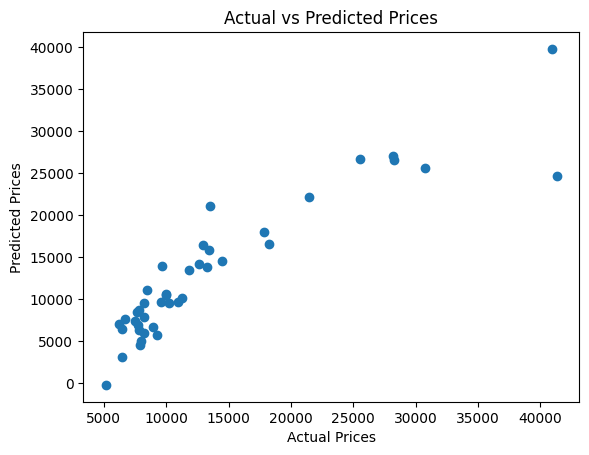

In [51]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [55]:
new_data = pd.DataFrame({
    'wheelbase': [104.9, 107.9, 95.7, 94.5, 96.5],
    'carlength': [175.0, 186.7, 169.7, 165.3, 167.5],
    'carwidth': [66.1, 68.4, 63.6, 63.8, 65.2],
    'carheight': [54.4, 56.7, 59.1, 54.5, 53.3],
    'curbweight': [2700, 3075, 2280, 1971, 2289],
    'enginesize': [134, 120, 92, 97, 110],
    'boreratio': [3.43, 3.46, 3.05, 3.15, 3.15],
    'stroke': [3.64, 2.19, 3.03, 3.29, 3.58],
    'compressionratio': [22.0, 8.4, 9.0, 9.4, 9.0],
    'horsepower': [72, 95, 62, 69, 86],
    'peakrpm': [5000, 5000, 5000, 5500, 5500],
    'citympg': [21, 19, 27, 26, 28],
    'highwaympg': [27, 24, 37, 33, 38],
    'doornumbers_encoded': [0, 0, 0, 0, 1],
    'name_encoded': [60, 85, 121, 76, 41],
    'fueltypes_encoded': [0, 1, 1, 1, 0],
    'aspiration_encoded': [0, 0, 0, 0, 0],
    'carbody_encoded': [3, 4, 2, 1, 0],
    'drivewheels_encoded': [2, 1, 0, 1, 1],
    'enginelocation_encoded': [0, 0, 0, 0, 0],
    'enginetype_encoded': [3, 2, 4, 0, 1],
    'cylindernumber_encoded': [2, 3, 1, 6, 5],
    'fuelsystem_encoded': [3, 5, 1, 0, 4],
})


# Make predictions
predictions = model.predict(new_data)

# Print the predictions
print(predictions)

[16131.85493748 16396.88263636  8030.6294958   8051.65991411
  1223.4742517 ]


In [58]:
predicted_prices = ['$' + str(price) for price in predicted_prices_int]
print(predicted_prices)


['$16131', '$16396', '$8030', '$8051', '$1223']


In [59]:
import joblib
joblib.dump(model, 'Multiple_linear_regression_model.joblib')

['Multiple_linear_regression_model.joblib']